# EDA

Before we get into actual machine learning. I wanted to look at the patterns in the dataset in order to think of feature selection/augmentation that I could perform in the machine learning phase of the project. 

In [2]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

plt.rcParams['figure.figsize'] = [20,10]

In [3]:
data = pd.read_csv('../data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,cooler_than_me.mp3,0.427503,2869.828620,2677.180491,6014.937118,0.133024,[129.19921875],-12.486107,66.946167,0.302483,...,2.956805,-4.295158,0.656407,-4.171000,0.771177,-1.440347,1.546116,-3.990371,2.771891,2010
1,airplanes.mp3,0.423003,2371.365987,2335.975387,4883.348314,0.111172,[92.28515625],-19.895674,88.955681,-16.760706,...,2.093508,-5.614816,2.615297,-4.192569,2.258908,-5.238406,2.319968,-3.514364,2.430466,2010
2,in_my_head.mp3,0.356209,3011.418486,2711.790253,6264.323144,0.145706,[112.34714674],-22.311823,56.398441,-11.291659,...,0.385180,-5.598175,3.440188,-7.220667,-0.522158,-4.795784,2.379431,-3.509303,1.032190,2010
3,tik_tok.mp3,0.389041,2566.800494,2495.921945,5313.328220,0.120453,[117.45383523],-32.024670,74.238457,-4.407170,...,2.125536,-6.483168,2.310317,-2.311590,-0.336032,-2.307950,0.711338,-3.418213,4.908051,2010
4,love_the_the_way_you_lie.mp3,0.409369,2796.553570,2507.576350,5479.505082,0.158967,[117.45383523],-39.791149,74.725708,-19.090473,...,0.675785,-6.952001,2.451728,-6.098280,0.664110,-6.628310,0.223306,-3.690106,-0.426928,2010


I want to convert some columns into different types, such as the year column into a categorical data column, Also, the tempo column is stuck in an array, so I would like to change that as well.

In [3]:
data.dtypes

filename               object
chroma_stft           float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
tempo                  object
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                   int64
dtype: object

In [4]:
# Changing label into categorical object
data['label'] = data['label'].astype('category')

In [5]:
# Fixing up tempo column
data['tempo'] = data['tempo'].apply(lambda x: x.replace('[', ''))
data['tempo'] = data['tempo'].apply(lambda x: x.replace(']', ''))
data['tempo'] = data['tempo'].astype('float64')

In [6]:
# Removing .mp3 prefix
data['filename'] = data['filename'].apply(lambda x: x.replace('.mp3', ''))

Here are some questions that I would like to answer via exploratory data analysis
1. What are some of the factors that have changed in music over the years?
    1. Look at scatterplots of each variable for each year
    2. Perform correlation tests (most likely perform a regression slope test)
    3. Perform student's t-tests/ANOVA/some other statistical test to see if t
2. What are some factors that have remained the same in music over the years?
    1. Perform the same type of analysis
3. Are there any features that highly correlated with each other?
    1. Look at correlation coefficients over the year
    2. Look at univariate plots
4. Are there any distinct groups of songs based on features? Why are they grouped together
    1. Create scatterplots and analyze grouping
    2. Again, perform statistical tests to see if the songs are actually different
5. Outlier analysis

## 1. Factors that Have Changed
Let's look at the boxplots of these variables over the years and see if there are any appreciable changes.

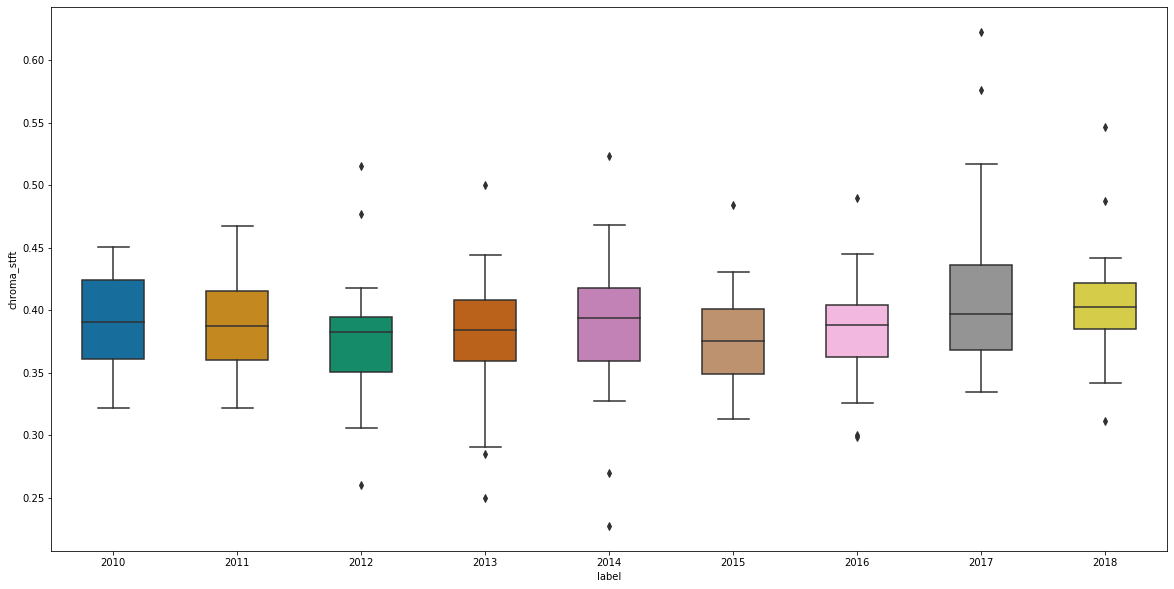

In [25]:
# Chroma_stft
sns.boxplot(y = 'chroma_stft', x = 'label',
           data = data,
            width = 0.5,
           palette = 'colorblind')

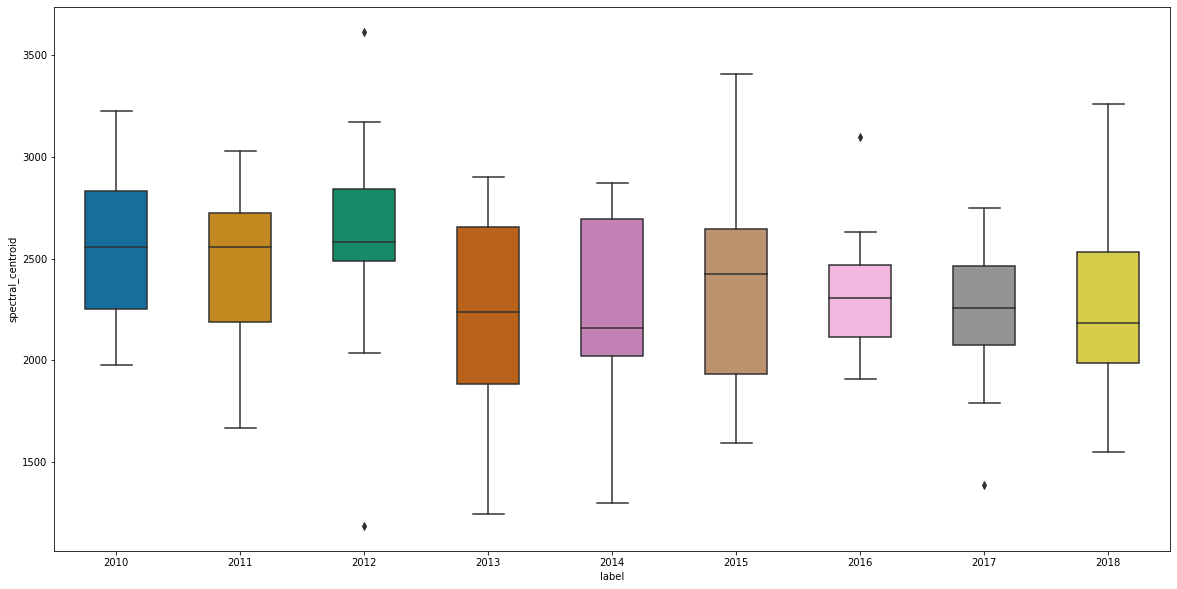

In [26]:
# spectral_centroid
sns.boxplot(y = 'spectral_centroid', x = 'label',
           data = data,
            width = 0.5,
           palette = 'colorblind')

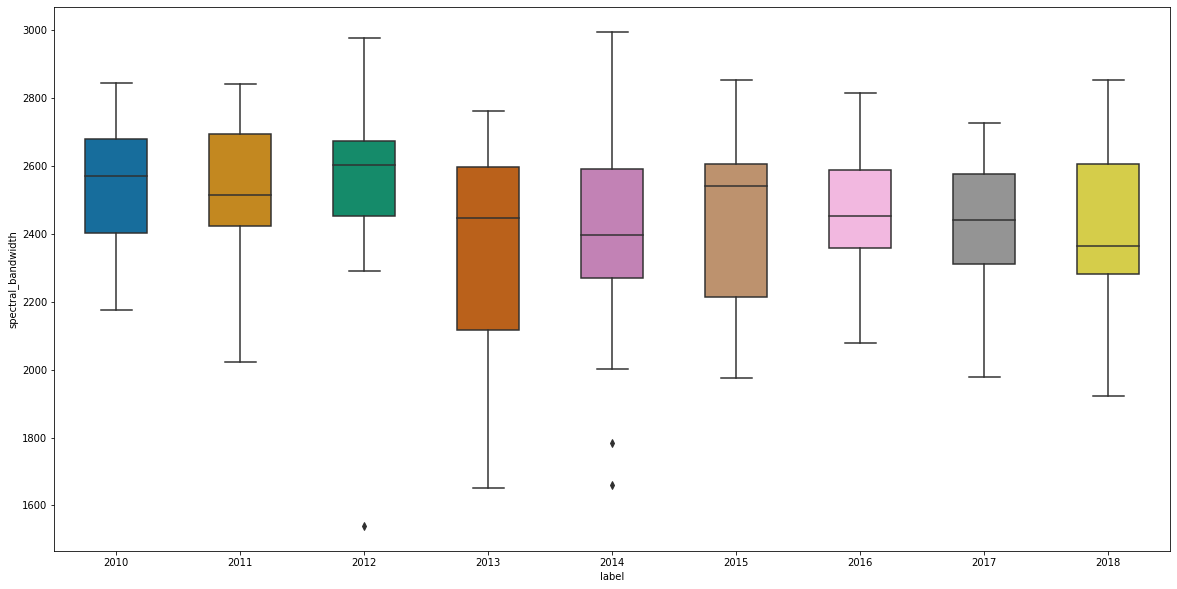

In [19]:
# spectral_bandwidth
sns.boxplot(y = 'spectral_bandwidth', x = 'label',
           data = data,
            width = 0.5,
           palette = 'colorblind')

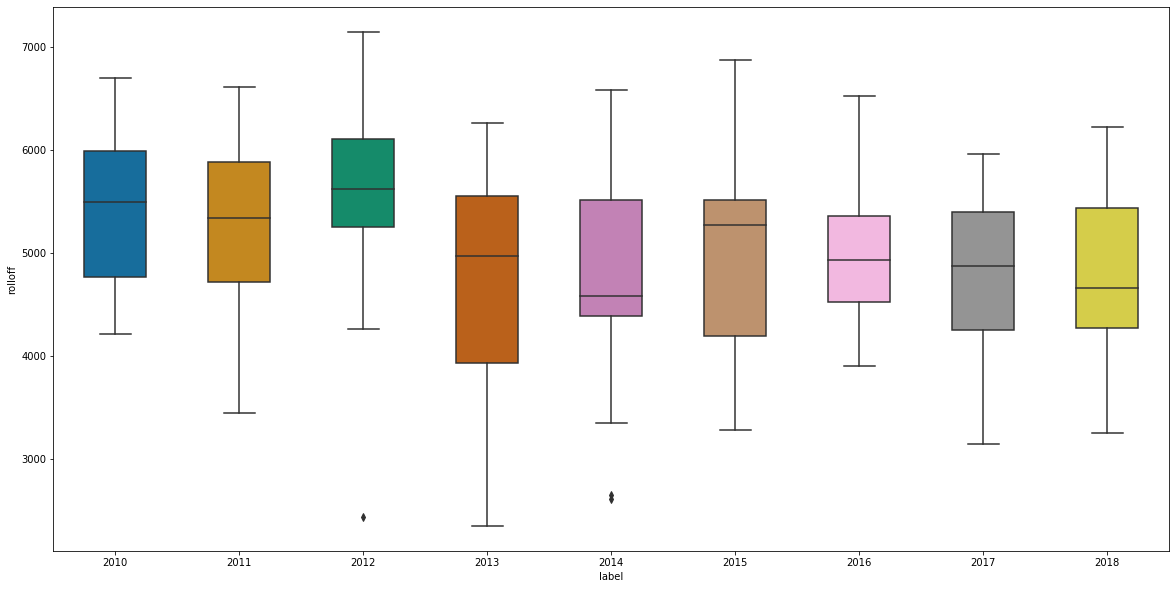

In [20]:
# rolloff
sns.boxplot(y = 'rolloff', x = 'label',
           data = data,
            width = 0.5,
           palette = 'colorblind')

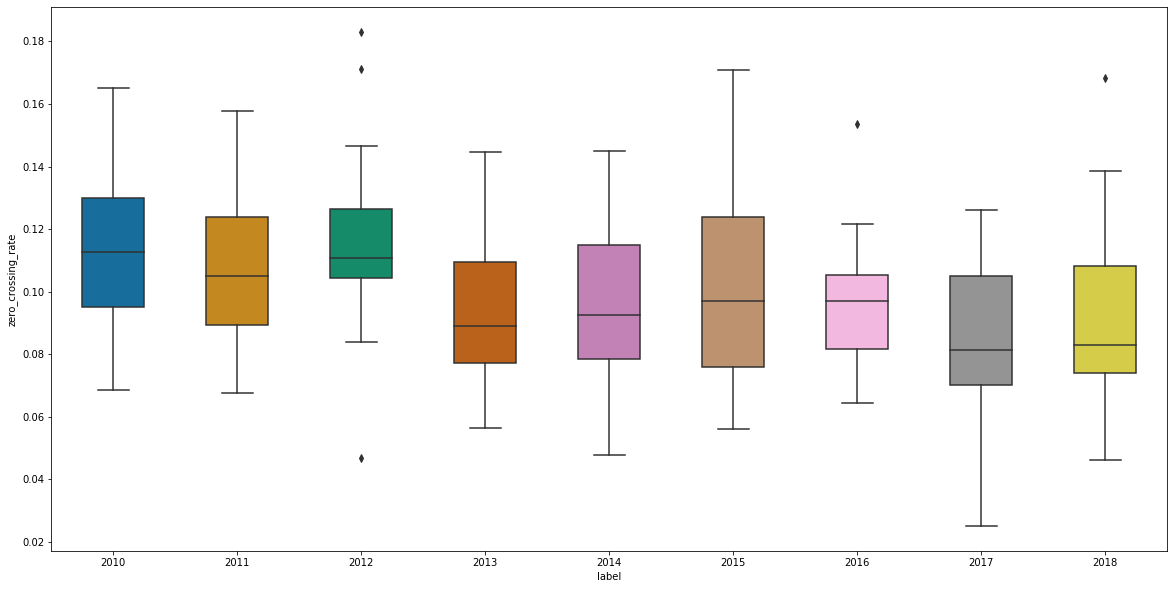

In [21]:
# Zero crossing rate
sns.boxplot(y = 'zero_crossing_rate', x = 'label',
           data = data,
           width = 0.5,
           palette = 'colorblind')

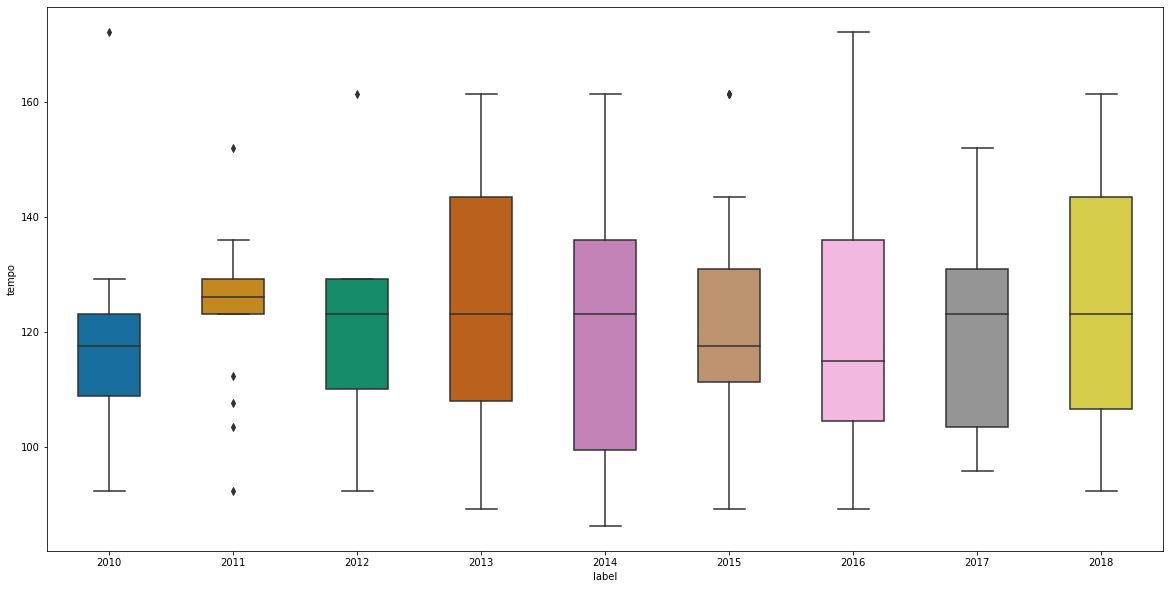

In [22]:
# Tempo
sns.boxplot(y = 'tempo', x = 'label',
           data = data,
           width = 0.5,
           palette = 'colorblind')

From these boxplots, we can see the following trends
1. There are lots of outliers, as seen by the diamonds. In terms of statistical theory, removing outliers is a dangerous idea. Often, these outliers have a story behind them and why they are in the dataset. For example, the fact that these songs are outliers may be the reason why they were popular in the first place. 
2. The only noticeable trends that we can see are: 
    1. Spectral centroid somewhat decreases as the years go by
    2. Rolloff decreases as we get closer to 2019
    3. Zero crossing rate takes an appreciable dip near 2019. 
   Figuring out whether these actually constitute trends is where statistics comes in! We will perform a t-test for a regression line. 
3. The metric that we all understand, tempo, has no change whatsoever. 
4. More MFCC analysis will come soon

### Regression Testing
Why are we performing linear regression, and what does t-tests have to do with anything?

In this situation, we are uncertain if there is any relationship between years and spectral centroid, rolloff and zero crossing rate. 

If we were certain, then we should be able to draw a linear regression line that has a non-zero slope. If there is no relationship, then the slope should be zero. 

This is what we are trying to do in this case. We will construct the a linear regression for each factor from 2010 to 2018. We will then examine the p-value of the slope, which will tell us the probability that the null hypothesis (that there is a slope of 0) is true given the data that we have. If the p-value is small, we can say with a reasonable amount of confidence that we are likely to have a non-zero slope, or in other words, an actual relationship. 

How much is a small p-value? To determine this, we will need to use Bonferroni correction as we are testing multiple hypotheses. Since we are using 3 tests, we will have a cut off value of 0.05/3 = 0.0167. 

Let's get started by creating a regression for rolloff.

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['rolloff'],data['label'])
print(f'The slope of the rolloff linear regression test is {slope}')
print(f'The p-value of the slope of the rolloff linear regression test is {p_value}')
print(f'The standard error of the slope of the rolloff linear regression test is {std_err}')

The slope of the rolloff linear regression test is -0.000602335210322736
The p-value of the slope of the rolloff linear regression test is 0.004651932363719353
The standard error of the slope of the rolloff linear regression test is 0.00021000733162144123


In [32]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['spectral_centroid'],data['label'])
print(f'The slope of the spectral centroid linear regression test is {slope}')
print(f'The p-value of the slope of the spectral centroid linear regression test is {p_value}')
print(f'The standard error of the slope of the spectral centroid linear regression test is {std_err}')

The slope of the spectral centroid linear regression test is -0.0013561736465042343
The p-value of the slope of the spectral centroid linear regression test is 0.002732361290249828
The standard error of the slope of the spectral centroid linear regression test is 0.00044597577483192994


In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['zero_crossing_rate'],data['label'])
print(f'The slope of the zero crossing rate linear regression test is {slope}')
print(f'The p-value of the slope of the zero crossing rate linear regression test is {p_value}')
print(f'The standard error of the slope of the zero crossing rate linear regression test is {std_err}')

The slope of the zero crossing rate linear regression test is -27.569982233784827
The p-value of the slope of the zero crossing rate linear regression test is 6.650760961928897e-05
The standard error of the slope of the zero crossing rate linear regression test is 6.741088438837982


Looking at the results of the regression slope t-tests, we can be fairly confident that the slope between the rolloff, spectral centroid and the zero-crossing rate are not 0 as the p-value is well below our threshold of 0.0167.

Let's plot out the regression line between the dependent variable (year) and each of the independent variables. 

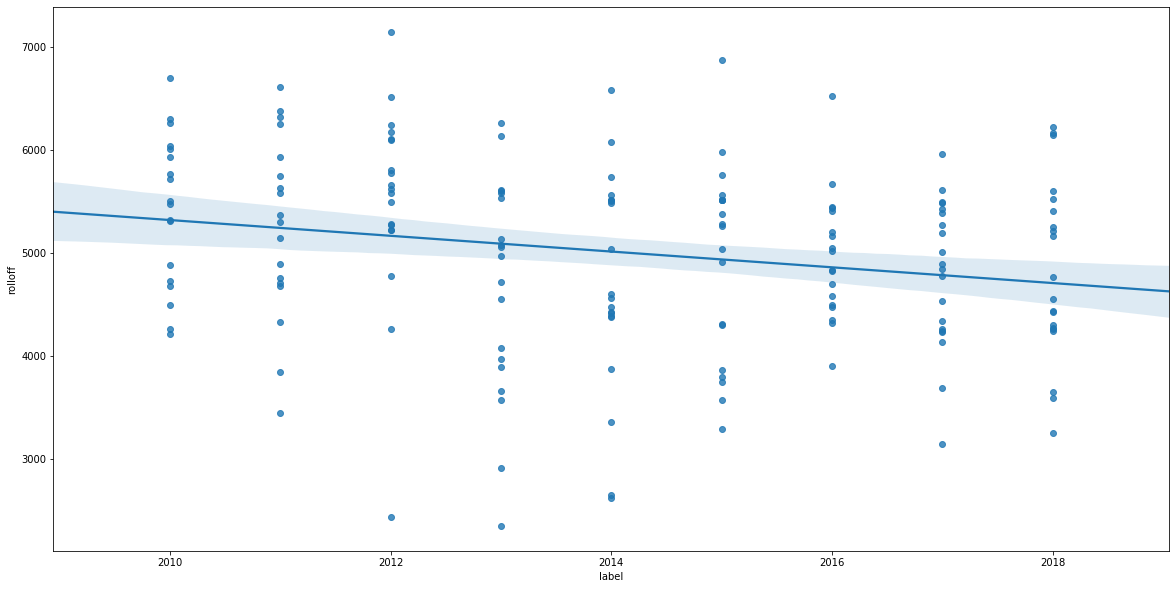

In [18]:
# Rolloff
plt.rcParams['figure.figsize'] = [20,10]
data['label'] = data['label'].astype('float64') # Just to get regression to work
sns.regplot(x="label", y="rolloff", data = data);

In [ ]:
# Spectral centroid
sns.regplot(x="label", y="rolloff", data = data);